In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
# import plotly.express as pltly
# import plotly
import pandas as pd
from functools import partial
import networkx as net
# import plotly.graph_objects as go

In [4]:
np.set_printoptions(suppress = True)

**Comparison of the optimality gap $F({\bar{\theta}}^{(t)}) - F^\ast$ between digital and analog schemes with varying channel uses $N$**

In [840]:
opt = 0.42
losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_1_a_200.00_zeta0_0.0010_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
K = losseses.shape[1]
df1 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_500_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_1 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_1000_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_2 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_2000_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_3 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_5000_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_4 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_10000_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_5 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_2_P_0.000020mW_N_20000_a_200.00_zeta0_0.0010_a_prime_1000.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df1_6 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_500_a_200.00_zeta0_0.0010_a_prime_35355.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df2_1 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_1000_a_200.00_zeta0_0.0010_a_prime_42045.00_chain_n-1.pkl', 'rb') )
losseses = np.array(losseses[1]) - opt
df2_2 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = []
for n in range(5):
    temp = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_2000_a_200.00_zeta0_0.0010_a_prime_50000.00_chain_n-{:d}.pkl'.format(n), 'rb') )
    losseses.append(temp[n])
losseses = np.array(losseses[:5]) - opt
df2_3 = pd.DataFrame(losseses.mean(axis=0), columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = []
for n in range(5):
    temp = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_5000_a_200.00_zeta0_0.0010_a_prime_62872.00_chain_n-{:d}.pkl'.format(n), 'rb') )
    losseses.append(temp[n])
losseses = np.array(losseses[:5]) - opt
df2_4 = pd.DataFrame(losseses.mean(axis=0), columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = []
for n in range(5):
    temp = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_10000_a_200.00_zeta0_0.0010_a_prime_74767.00_chain_n-{:d}.pkl'.format(n), 'rb') )
    losseses.append(temp[n])
losseses = np.array(losseses[:5]) - opt
df2_5 = pd.DataFrame(losseses.mean(axis=0), columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = []
for n in range(5):
    temp = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_20000_a_200.00_zeta0_0.0010_a_prime_88914.00_chain_n-{:d}.pkl'.format(n), 'rb') )
    losseses.append(temp[n])
losseses = np.array(losseses[:5]) - opt
df2_6 = pd.DataFrame(losseses.mean(axis=0), columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_25000_a_200.00_zeta0_0.0010_a_prime_94015.00_chain_n-0.pkl', 'rb') )
losseses = np.array(losseses[0]) - opt
df2_7 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )

losseses = pickle.load( open('../repo_jv/data/simulations/losseses_local_a_200.00.pkl', 'rb') )
losseses = np.array(losseses) - opt
df8 = pd.DataFrame(losseses[0], columns = ['Device_{}'.format(i + 1) for i in range(K)] )

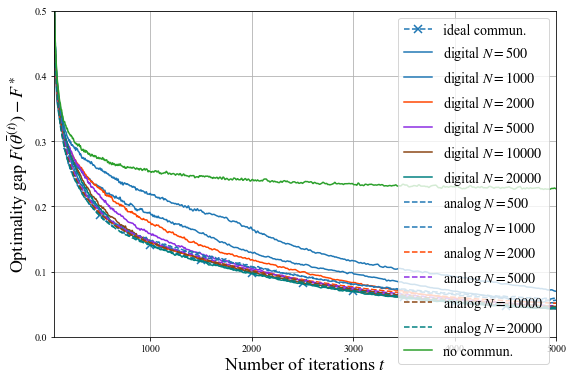

In [841]:
plt.rc('font', family='Times New Roman')
mpl.rcParams["mathtext.fontset"] = 'stix'
fig, ax = plt.subplots(figsize = (9.0,6.0))

df1normal = df1.mean(axis = 1)[0] - opt
df1 = df1.rolling(window = 49).mean().mean(axis = 1) / df1normal
df1.plot(style = '--', marker = 'x', fillstyle = 'none', ms = 8, mew = 1.5, markevery = 500, label = r'ideal commun.')

df1_1normal = df1_1.mean(axis = 1)[0] - opt
df1_1 = df1_1.rolling(window = 49).mean().mean(axis = 1) / df1_1normal
df1_1.plot(color = 'C0', label = r'digital $N=500$')
df1_2normal = df1_2.mean(axis = 1)[0] - opt
df1_2 = df1_2.rolling(window = 49).mean().mean(axis = 1) / df1_2normal
df1_2.plot(color = 'C0', label = r'digital $N=1000$')
df1_3normal = df1_3.mean(axis = 1)[0] - opt
df1_3 = df1_3.rolling(window = 49).mean().mean(axis = 1) / df1_3normal
df1_3.plot(color = 'orangered', label = r'digital $N=2000$')
df1_4normal = df1_4.mean(axis = 1)[0] - opt
df1_4 = df1_4.rolling(window = 49).mean().mean(axis = 1) / df1_4normal
df1_4.plot(color = 'blueviolet', label = r'digital $N=5000$')
df1_5normal = df1_5.mean(axis = 1)[0] - opt
df1_5 = df1_5.rolling(window = 49).mean().mean(axis = 1) / df1_5normal
df1_5.plot(color = 'saddlebrown', label = r'digital $N=10000$')
df1_6normal = df1_6.mean(axis = 1)[0] - opt
df1_6 = df1_6.rolling(window = 49).mean().mean(axis = 1) / df1_6normal
df1_6.plot(color = 'teal', label = r'digital $N=20000$')

df2_1normal = df2_1.mean(axis = 1)[0] - opt
df2_1 = df2_1.rolling(window = 49).mean().mean(axis = 1) / df2_1normal
df2_1.plot(style = '--', color = 'C0', label = r'analog $N=500$')
df2_2normal = df2_2.mean(axis = 1)[0] - opt
df2_2 = df2_2.rolling(window = 49).mean().mean(axis = 1) / df2_2normal
df2_2.plot(style = '--', color = 'C0', label = r'analog $N=1000$')
df2_3normal = df2_3.mean(axis = 1)[0] - opt
df2_3 = df2_3.rolling(window = 49).mean().mean(axis = 1) / df2_3normal
df2_3.plot(style = '--', color = 'orangered', label = r'analog $N=2000$')
df2_4normal = df2_4.mean(axis = 1)[0] - opt
df2_4 = df2_4.rolling(window = 49).mean().mean(axis = 1) / df2_4normal
df2_4.plot(style = '--', color = 'blueviolet', label = r'analog $N=5000$')
df2_5normal = df2_5.mean(axis = 1)[0] - opt
df2_5 = df2_5.rolling(window = 49).mean().mean(axis = 1) / df2_5normal
df2_5.plot(style = '--', color = 'saddlebrown', label = r'analog $N=10000$')
df2_6normal = df2_6.mean(axis = 1)[0] - opt
df2_6 = df2_6.rolling(window = 49).mean().mean(axis = 1) / df2_6normal
df2_6.plot(style = '--', color = 'teal', label = r'analog $N=20000$')
# df2_7normal = df2_7.mean(axis = 1)[0] - opt
# df2_7 = df2_7.rolling(window = 49).mean().mean(axis = 1) / df2_7normal
# df2_7.plot(style = '--', color = 'teal', label = r'analog $N=25000$')

df8_normal = df8.mean(axis = 1)[0] - opt
df8 = df8.rolling(window = 49).mean().mean(axis = 1) / df8_normal
df8.plot(color = 'tab:green', label = 'no commun.')

plt.xlabel(r'Number of iterations $t$', fontsize = 18)
plt.ylabel(r'Optimality gap $F(\bar{\theta}^{(t)})-F^\ast$', fontsize = 18)
# plt.title(r'ER graph with $p = 0.2$ and $\barP = -57$dBm', fontsize = 14)
plt.xlim((50, 5000))
plt.ylim((0, 0.5))
plt.grid()

# Place legend for individual curves
plt.legend(loc = 'upper right', fontsize = 14)
# # Place marks using annotation
# from matplotlib.patches import Ellipse
# el = Ellipse((800, 0.34), 75, 0.070, angle = 0, fill = False, lw = 1.5)
# ax.add_artist(el)
# el = Ellipse((1800, 0.20), 60, 0.055, angle = 0, fill = False, lw = 1.5)
# ax.add_artist(el)
# _ = ax.annotate(r'$N = 1000$',
#             xy = (810, .33), xycoords = 'data',
#             xytext = (50, -5), textcoords = 'offset points', fontsize = 14,
#             arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))
# _ = ax.annotate(r'$N = 20000$',
#             xy = (1785, .2), xycoords = 'data',
#             xytext = (-100, -40), textcoords = 'offset points', fontsize = 14,
#             arrowprops=dict(facecolor = 'black', width = 1.5, headwidth = 6, shrink = 0.03))

# _ = plt.savefig('C:/Users/Helen/Documents/visiting_research@KCL/D2D_DSGD/XXX20-FL_over_D2D/eps/dig_scheduling-vs_TDMA.eps',format='eps', dpi=600)
plt.show()

In [723]:
# print(f'{df1_1[2500] + opt}')
n = 3500
print(f'{df8[n] }')
print('\n')
print(f'{df1_1[n]}')
print(f'{df1_2[n]}')
print(f'{df1_3[n]}')
print(f'{df1_4[n]}')
print(f'{df1_5[n]}')
print(f'{df1_6[n]}')
print('\n')
print(f'{df2_1[n]}')
print(f'{df2_2[n]}')
print(f'{df2_3[n]}')
print(f'{df2_4[n]}')
print(f'{df2_5[n]}')
print(f'{df2_6[n]}')
# print(f'{df2_7[n] + opt}')
print('\n')
print(f'{df1[n]}')

0.23321007240627514


0.10276779106594734
0.08215978889328746
0.0698170507781948
0.061819329155066494
0.05982684794680464
0.059626817171149545


0.07087437805376091
0.0732861096417936
0.06729126151069903
0.0651060567343867
0.06381327701093298
0.061915598857959456


0.060895405798844435


In [709]:
local = .235 * np.ones((6,))
ideal = 0.081 * np. ones(local.shape)

In [711]:
dig = [0.135, 0.110, 0.100, 0.086, 0.083, 0.081]
ana = [0.092, 0.092, 0.088, 0.087, 0.086, 0.084]

In [713]:
losseses = pickle.load( open('../repo_jv/data/grid_search4comp/losseses_SCHEME_4_P_0.000020mW_N_25000_a_200.00_zeta0_0.0010_a_prime_94015.00_chain_n-0.pkl', 'rb') )
losseses = np.array(losseses[0]) - opt
df2_7 = pd.DataFrame(losseses, columns = ['Device_{}'.format(i + 1) for i in range(K)] )
df2_7 = df2_7.rolling(window = 49).mean().mean(axis = 1)